# Data exploration
## Multivariate time series data - Example: bike rental data

In this notebook we will import a dataset on bike rental over time with additional weather information.
The aim here is to illustrate how such a dataset can be explored using different popular python libraries, such as numpy, pandas, seaborn, matplotlib.

### Import libraries

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
#import os # accessing directory structure

## Import data
### Dataset on bike rental form UCI:
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

--> Unzip and copy data to folder.

### Information from website: 

Attribute Information:  
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

In [2]:
# e.g. on Windows machine: 
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Courses\\python_data_exploration_tutorial\\"
filename = ROOT + 'data\\hour.csv'



In [3]:
# Import csv file as pandas DataFrame
data_bike_rent = pd.read_csv(filename, delimiter=',') #, nrows = X) # if you want to only import the first X rows

### Inspect the data...

In [4]:
data_bike_rent.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

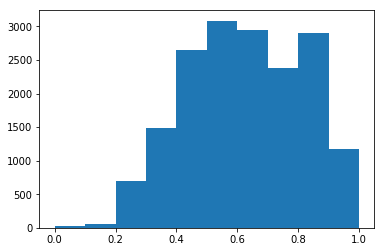

In [5]:
plt.hist(data_bike_rent.hum, 10)

### Detect correlations in data
Finding correlations is often one of the key steps when exploring multivariate datasets.  
One quick way to do this is by calculating (and displaying) a **correlation matrix**. 

### Calculating a correlation matrix

In [7]:
# Pandas
#df.corr()

# Numpy --> covariance matrix
#np.cov()

In [27]:
def plot_corr_matrix(df, fig_width):
    """ Plot correlation matrix.
    Args:
    -------
    df: pandas DataFrame
        Data to derive correlation matrix from.
    fig_width: float
        Width of figure.
    """
    
    # Remove NaN's
    df = df.dropna('columns')
    
    # Calculate correlation matrix
    corr = df.corr()
    
    # Plot
    plt.style.use('ggplot') #'default'
    fig = plt.figure(num=None, figsize=(fig_width, fig_width), facecolor='w', edgecolor='k')
    fig = plt.matshow(corr, fignum = 1, cmap = 'viridis')
    
    """ plt.matshow is a special version of imshow to plot matrix values. 
    If you like to have more control of how the figure loooks like, 
    try alternative ways, such as "pcolor" or "imshow"
    
    ax = fig.add_subplot(111)
    fig = plt.pcolor(corr, edgecolors='k', linewidths=2)
    ax.set_aspect(1)
    """
    
    # Set axis labels
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(fig)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

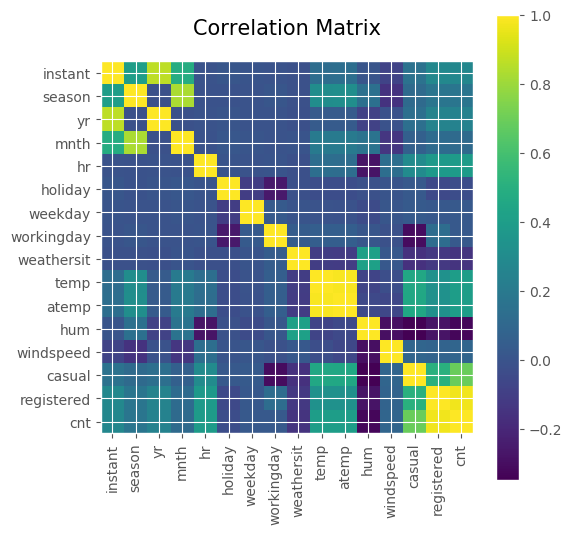

In [29]:
plot_corr_matrix(data_bike_rent, 6)

### Alternative: use build in function from seaborn
Seaborn is a library with many easy-to-use plotting functions. And those tend to be better-looking (objectively judged by me) than the default matplotlib ones. Matplotlib is more customizable though.

In [60]:
#import seaborn as sns

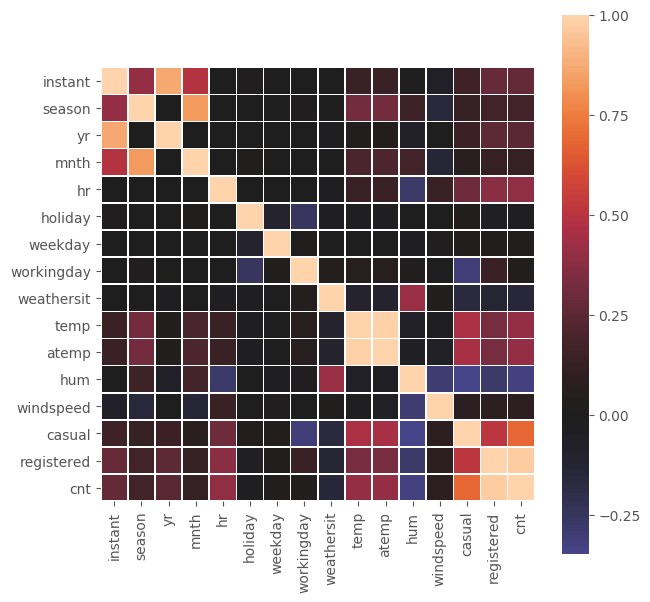

In [42]:
corr = data_bike_rent.corr()

plt.figure(num=None, figsize=(7,7))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            #cmap=sns.diverging_palette(220, 10, as_cmap=True), # define colormap
            center=0, # correlations matrix values are between -1 and 1, so we want to center the cmap to 0
            # annot=True, fmt='.1f', # plot matrix values on top
            linewidths=.5, 
            square=True)

## Having the correlation matrix we can start to dig deeper...

Text(0,0.5,'cnt')

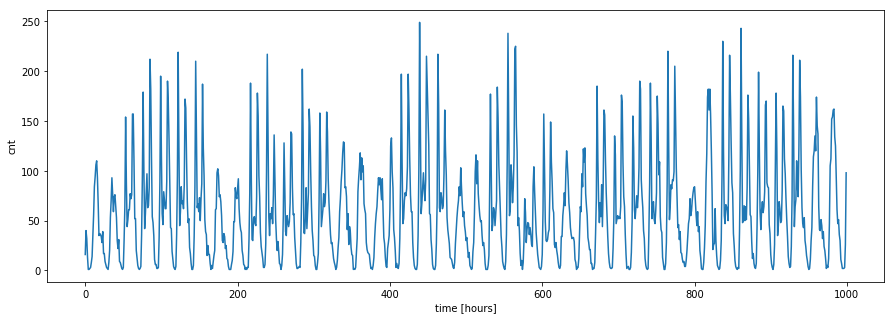

In [16]:
plt.figure(num=None, figsize=(15,5))
plt.plot(data_bike_rent['cnt'][:1000])
plt.xlabel('time [hours]')
plt.ylabel('cnt')

### Slicing, querying...

In [43]:
data1 = data_bike_rent[(data_bike_rent['hr'] == 0) & (data_bike_rent['weekday'] == 1)]['cnt']

In [44]:
data_day1 = data_bike_rent[data_bike_rent['weekday'] == 1][['hr', 'cnt']]

In [45]:
data_day1[:30]

,hr,cnt
47,0,5
48,1,2
49,4,1
50,5,3
51,6,30
52,7,64
53,8,154
54,9,88
55,10,44
56,11,51


### Select particluar data for all weekdays == 1

In [47]:
data_cnt = data_bike_rent[data_bike_rent['weekday'] == 1]['cnt'].values
data_hr = data_bike_rent[data_bike_rent['weekday'] == 1]['hr'].values
data_cnt.shape, data_hr.shape

((2479,), (2479,))

In [48]:
data_cnt

array([ 5,  2,  1, ..., 90, 61, 49], dtype=int64)

### Find subset where also hour == 0
+ This could as well be done using pandas. To illustrate more of numpy we now do it using numpy though...

In [49]:
np.where(data_hr == 0)[0] # np.where gives all indices where condition is True

array([   0,   22,   46,   70,   93,  117,  141,  165,  189,  211,  234,
        257,  280,  303,  327,  350,  374,  398,  422,  446,  470,  494,
        518,  542,  566,  590,  614,  638,  662,  686,  710,  734,  758,
        782,  806,  830,  854,  877,  901,  925,  949,  973,  997, 1021,
       1045, 1069, 1093, 1117, 1140, 1164, 1188, 1212, 1235, 1258, 1282,
       1306, 1330, 1354, 1377, 1401, 1424, 1448, 1472, 1496, 1520, 1544,
       1567, 1591, 1615, 1639, 1663, 1687, 1711, 1735, 1759, 1783, 1807,
       1831, 1855, 1879, 1903, 1927, 1951, 1975, 1999, 2023, 2047, 2071,
       2095, 2119, 2143, 2167, 2191, 2215, 2239, 2263, 2264, 2288, 2312,
       2336, 2360, 2384, 2408, 2432, 2455], dtype=int64)

In [50]:
data_cnt[np.where(data_hr == 0)[0]]

array([  5,   5,  17,   7,   7,  15,  11,  37,  30,   4,  11,  13,  12,
         6,  23,  39,  12, 177,  53,  38,  41, 103,  29,  28,  26,  32,
       140,  35,  51,  34,  29,  30,  25,  40,  34,  97,  16,  37,  29,
        16,  53,  37,  32,  23,  15,  30,  17,  16,  24,  20,  17,  11,
        39,  15,  25,  19,  10,  21,   9,  41,  29,  17,  24,  23,  33,
        17,  37,  41,   6,  48,  34,  35,  40,  65,  49,  41,  40,  68,
        43,  39,  43,  47,  58,  33,  47,  26,  32, 104,  41,  45,  64,
        45,  51,  48,  31,  22,  23,  49,  27,  23,  21,  20,  28,  12,
        34], dtype=int64)

### Sort entire data accoring to day and hour

In [51]:
# Create new numpy array to collect the data
data_timed = np.zeros((24,7)) # 24 (hours) x 7 (days) numpy array

for day in range(7):
    idx_day = data_bike_rent['weekday'] == day
    data = data_bike_rent[idx_day]['cnt'].values
    data_hr = data_bike_rent[idx_day]['hr'].values
    for hour in range(24):
        cnts = data[np.where(data_hr == hour)[0]]
        data_timed[hour, day] = np.sum(cnts)/cnts.shape[0]

In [55]:
#data_timed[:,0]
np.round(data_timed[:,0], 2)

array([ 93.99,  77.43,  61.63,  31.14,   9.36,   8.69,  14.5 ,  33.1 ,
        83.86, 156.54, 258.58, 315.38, 372.96, 374.93, 363.63, 353.93,
       355.4 , 318.77, 272.63, 225.48, 168.03, 127.65,  94.12,  61.9 ])

In [ ]:
fig = plt.figure(num=None, figsize=figsize)
for day in range(7):
    plt.plot(data_timed[:,day], label = "weekday "+str(day))
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel('cnt')

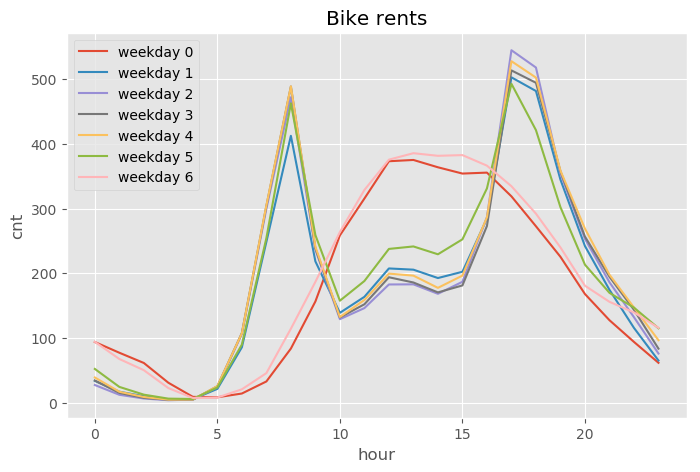

In [71]:
def plot_daily_average(data_array, labels, ylabel, figsize = (8,5)):
    #plt.style.use('ggplot') #'default'
    fig = plt.figure(num=None, figsize=figsize)
    for day in range(data_array.shape[1]):
        plt.plot(data_array[:,day], label = labels[day])
    plt.legend()
    plt.title('Bike rents')
    plt.xlabel('hour')
    plt.ylabel(ylabel)

labels = ["weekday "+str(i) for i in range(7)]

plot_daily_average(data_timed, labels, 'cnt')

### Generealize sorting function a bit

In [58]:
def sort_by_time(selected_feature):
    """ selected_feature must be column name """
    data_timed = np.zeros((24,7))
    for day in range(7):
        idx_day = data_bike_rent['weekday'] == day
        data = data_bike_rent[idx_day][selected_feature].values
        data_hr = data_bike_rent[idx_day]['hr'].values
        for hour in range(24):
            feature = data[np.where(data_hr == hour)[0]]
            data_timed[hour, day] = np.sum(feature)/feature.shape[0]
    return data_timed

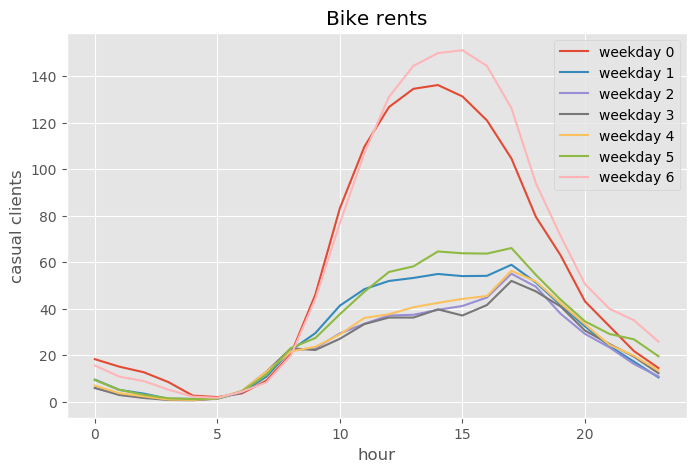

In [72]:
data_casual = sort_by_time('casual')

labels = ["weekday "+str(i) for i in range(7)]
plot_daily_average(data_casual, labels, 'casual clients')

### Explore other correlations - humidity

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

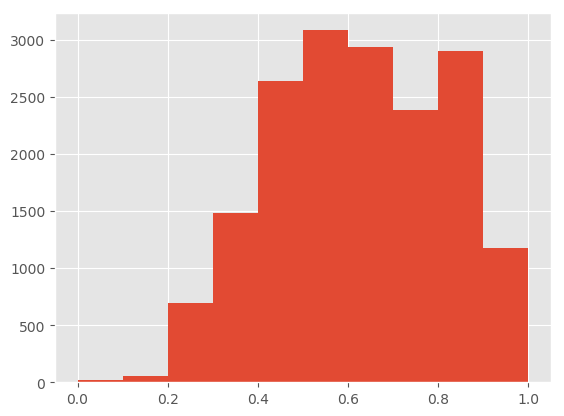

In [61]:
plt.hist(data_bike_rent['hum'], 10)

In [62]:
# Can also be done using numpy (with more options on how to split the data)
#np.histogram(data_bike_rent['hum'])

### Some more slicing - select fractions of specific humidity

In [63]:
IDx = data_bike_rent.index[(data_bike_rent['hum'] <= 1.0) & (data_bike_rent['hum'] > 0.9)].values

(array([763., 203.,  90.,  51.,  26.,  15.,   8.,   5.,   2.,   5.]),
 array([  1.,  74., 147., 220., 293., 366., 439., 512., 585., 658., 731.]),
 <a list of 10 Patch objects>)

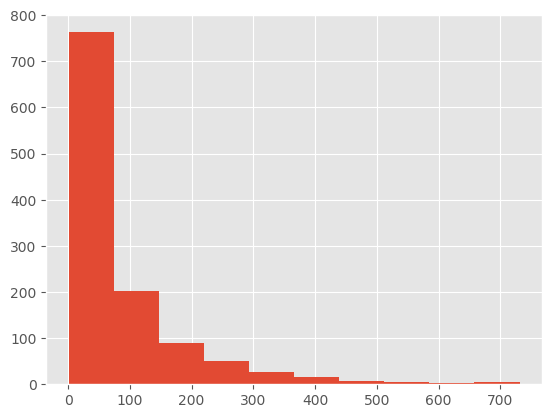

In [64]:
plt.hist(data_bike_rent.loc[IDx, 'cnt'], 10)

In [77]:
# Split data into weekend <-> working day
# and futher into bins of humidity

def sort_by_humidity(selected_feature, selected_days, bins_hum):
    """ Split into selected days and humity bins """
    data_timed = np.zeros((24, len(bins_hum)-1))                         
    data_timed_error = np.zeros((24, len(bins_hum)-1)) 
                          
    for i in range(len(bins_hum)-1):
        data_selection = data_bike_rent[(data_bike_rent['weekday'].isin(selected_days)) & 
                              (data_bike_rent['hum'] <= bins_hum[i+1]) & 
                              (data_bike_rent['hum'] > bins_hum[i])] #[['hr', feature]]   
        data_hr = data_selection['hr'].values
        data_selection = data_selection[selected_feature].values
        for hour in range(24):
            feature = data_selection[np.where(data_hr == hour)[0]]
            data_timed[hour, i] = np.sum(feature)/feature.shape[0]
            data_timed_error[hour, i] = np.std(feature) # use numpy to calculate standard deviation
    return data_timed, data_timed_error

Now that we also get an error (here: standard deviation) with the data, we could update the plotting function

In [92]:
def plot_daily_average2(data_array, 
                        error_array, 
                        labels, 
                        ylabel, 
                        title = 'Bike rents',
                        figsize = (8,5)):
    
    #plt.style.use('ggplot') #'default'
    fig = plt.figure(num=None, figsize=figsize)
    for i in range(data_array.shape[1]):
        y = data_array[:,i]
        plt.plot(y, label = labels[i])
        plt.fill_between(np.arange(24), 
                         y-0.5*error_array[:, i], 
                         y+0.5*error_array[:, i], 
                         alpha = 0.2)
    plt.legend()
    plt.title(title)
    plt.xlabel('hour')
    plt.ylabel(ylabel)

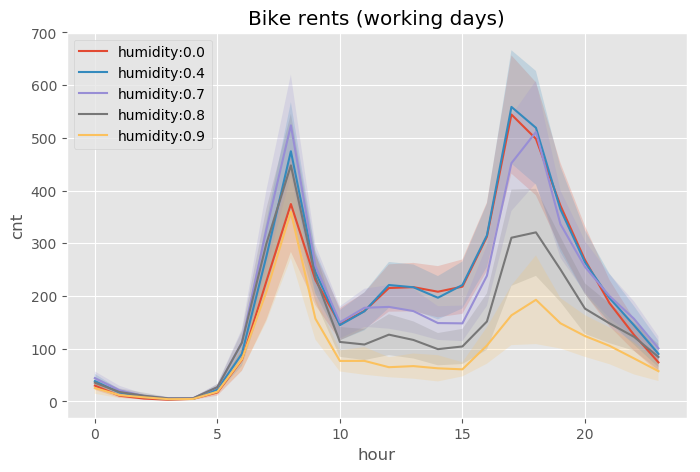

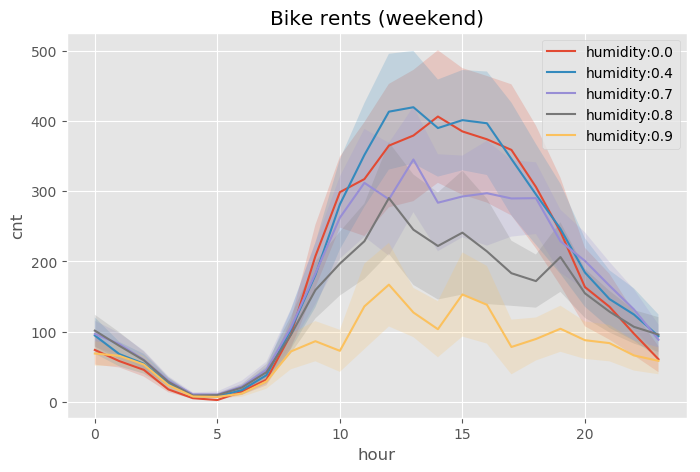

In [93]:
bins_hum = [0., 0.4, 0.7, 0.8, 0.9, 1. ]
labels = ["humidity:" + str(bins) for bins in bins_hum]
selected_feature = 'cnt'
days_week = [1,2,3,4,5]
days_weekend = [0,6]

data_humidity, error = sort_by_humidity(selected_feature, days_week, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (working days)")

data_humidity, error = sort_by_humidity(selected_feature, days_weekend, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (weekend)")

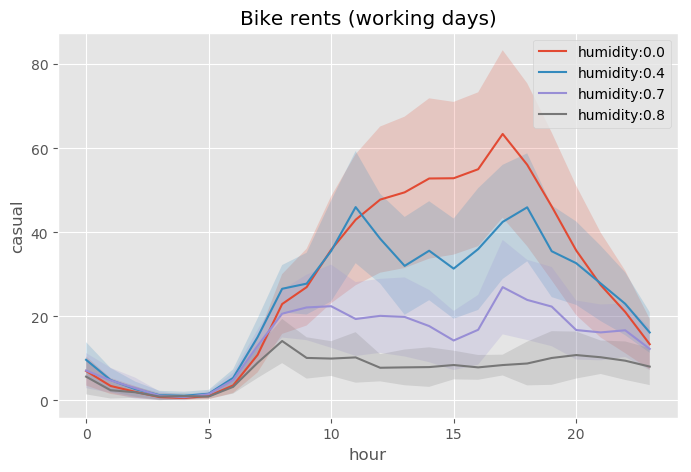

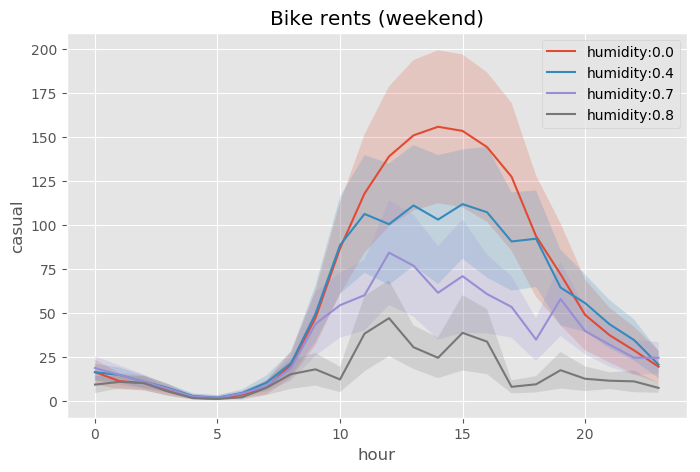

In [94]:
bins_hum = [0., 0.7, 0.8, 0.9, 1. ]
selected_feature = 'casual'
days_week = [1,2,3,4,5]
days_weekend = [0,6]

data_humidity, error = sort_by_humidity(selected_feature, days_week, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (working days)")

data_humidity, error = sort_by_humidity(selected_feature, days_weekend, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (weekend)")

## Linear regression

The same dataset has also been used in https://christophm.github.io/interpretable-ml-book/limo.html